# Challenge 2 - Accident Hotspots
> In 2018 and 2019, which municipalities recorded the highest number of accidents? <br>
> Can you estimate which Department of Transport managed roads have the highest number of accidents recorded? (where it is possible to deduce) </br>
> Can you design choropleth visualisations for the answers above? <br>
> Can you show accident hotspots in the top 10 percentile?</br>
> Are accidents correlated with variables such as time of day, and reported conditions?

In [0]:
import pandas
accidents_pd = pandas.read_csv('https://data.ny.gov/api/views/e8ky-4vqe/rows.csv?accessType=DOWNLOAD&sorting=true')
accidents_pd.head()

Out[1]:

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2019,Property Damage Accident,17:14,12/31/2019,Tuesday,Y,Dark-Road Unlighted,MIDDLESEX,OTHER,YATES,Straight and Level,Snow,None,Wet,364 66011104,Not Applicable,Deer,1
1,2019,Property Damage Accident,22:08,12/31/2019,Tuesday,Y,Dark-Road Unlighted,LE RAY,SIDESWIPE,JEFFERSON,Straight and Level,Snow,None,Snow/Ice,26 73071094,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2019,Property Damage Accident,14:50,12/31/2019,Tuesday,Y,Daylight,HEMPSTEAD,OVERTAKING,NASSAU,Straight and Level,Cloudy,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2019,Property Damage & Injury Accident,22:50,12/31/2019,Tuesday,Y,Dark-Road Lighted,BROOKHAVEN,RIGHT ANGLE,SUFFOLK,Straight and Level,Rain,Stop Sign,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2019,Property Damage & Injury Accident,15:05,12/31/2019,Tuesday,Y,Daylight,BLOOMING GROVE,REAR END,ORANGE,Straight and Level,Clear,No Passing Zone,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2


In [0]:
accidents_pd.columns

Out[2]: Index(['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
 'Police Report', 'Lighting Conditions', 'Municipality',
 'Collision Type Descriptor', 'County Name', 'Road Descriptor',
 'Weather Conditions', 'Traffic Control Device',
 'Road Surface Conditions', 'DOT Reference Marker Location',
 'Pedestrian Bicyclist Action', 'Event Descriptor',
 'Number of Vehicles Involved'],
 dtype='object')

In [0]:
accidents_pd.count()

Out[3]: Year 881617
Crash Descriptor 881617
Time 881617
Date 881617
Day of Week 881617
Police Report 881617
Lighting Conditions 881617
Municipality 873107
Collision Type Descriptor 881617
County Name 881617
Road Descriptor 881617
Weather Conditions 881617
Traffic Control Device 881617
Road Surface Conditions 881617
DOT Reference Marker Location 288143
Pedestrian Bicyclist Action 881617
Event Descriptor 881617
Number of Vehicles Involved 881617
dtype: int64

> In 2018 and 2019, which municipalities had the most recorded accidents?

municipalities, taxi zones, DoT markers

In [0]:
# load and plot taxi zone data
import geopandas
taxi_zone_pd = geopandas.read_file('https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip').to_crs(2263)
municipalities_pd = geopandas.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Municipal_Court_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson').to_crs(2263)
dot_markers_nys_pd = geopandas.read_file('http://gis.ny.gov/gisdata/fileserver/?DSID=1112&file=ReferenceMarker.zip').to_crs(2263)
dot_markers_pd = geopandas.sjoin(dot_markers_nys_pd, taxi_zone_pd, op='intersects', how='inner')

/databricks/python/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
 warnings.warn(

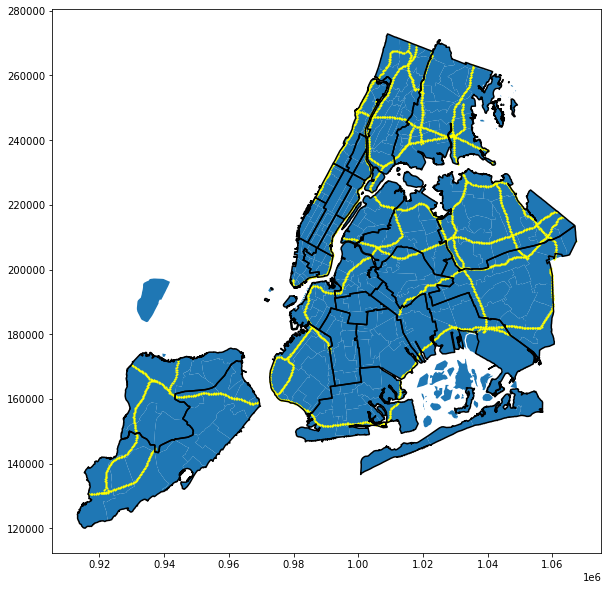

In [0]:
ax1 = municipalities_pd.to_crs(2263).boundary.plot(color='black')
ax2 = taxi_zone_pd.to_crs(2263).plot(ax=ax1)
ax3 = dot_markers_pd.plot(ax=ax2, color='yellow', markersize=1)
ax3.get_figure().set_size_inches(10, 10)

> In 2018 and 2019, which municipalities had the most recorded accidents? <br>

In [0]:
accidents_pd.groupby(['Year', 'Municipality']).agg({'Time': 'count'}).sort_values(by='Time', ascending=False)[:10]

Out[6]:

Time 
 
 
 Year 
 Municipality 
 
 
 
 
 
 2018 
 QUEENS 
 44848 
 
 
 2019 
 QUEENS 
 43830 
 
 
 2018 
 KINGS 
 38516 
 
 
 2019 
 KINGS 
 38012 
 
 
 2018 
 NEW YORK 
 24457 
 
 
 BRONX 
 23272 
 
 
 2019 
 BRONX 
 22838 
 
 
 NEW YORK 
 22364 
 
 
 HEMPSTEAD 
 17865 
 
 
 2018 
 HEMPSTEAD 
 16928

etimate counts for roads using DoT markers

In [0]:
dot_markers_pd.count()[1]

Out[7]: 3911

In [0]:
dot_markers_pd.head()

Out[8]:

,DATEMOD,ROUTE,MARKER,PANEL,DIR_TRAVEL,DATERETIRE,GEORTE,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
53375,None,24 03031,0,24 03031000,P,None,NY24,POINT (1059920.531 198317.551),190,191,0.130933,0.000688,Queens Village,191,Queens
159081,None,907AX5M22,104,907AX5M22104,R,None,PK907A,POINT (1059471.794 200517.177),190,191,0.130933,0.000688,Queens Village,191,Queens
159082,None,907AX5M22,103,907AX5M22103,R,None,PK907A,POINT (1059327.716 200043.916),190,191,0.130933,0.000688,Queens Village,191,Queens
159083,None,907AX5M22,102,907AX5M22102,R,None,PK907A,POINT (1059308.794 199548.975),190,191,0.130933,0.000688,Queens Village,191,Queens
159084,None,907AX5M22,101,907AX5M22101,R,None,PK907A,POINT (1059384.634 199059.077),190,191,0.130933,0.000688,Queens Village,191,Queens


join on lines / points will not work, we can draw a buffer around the markers to see which road is within N distance

In [0]:
roads_pd = geopandas.read_file('https://data.cityofnewyork.us/api/geospatial/svwp-sbcd?method=export&format=GeoJSON').to_crs(2263)

In [0]:
road_markers_pd = geopandas.sjoin(dot_markers_nys_pd, roads_pd, op='intersects', how='inner')
road_markers_pd.count()

Out[10]: DATEMOD 0
ROUTE 0
MARKER 0
PANEL 0
DIR_TRAVEL 0
DATERETIRE 0
GEORTE 0
geometry 0
index_right 0
rw_type 0
rwjurisdic 0
continuous 0
created_by 0
l_low_hn 0
modified_b 0
bphys_id 0
rsubsect 0
collection 0
twisted_pa 0
r_zip 0
r_low_hn 0
bike_lane 0
nominaldir 0
snow_prior 0
to_level_c 0
joinid 0
r_blockfac 0
seglocstat 0
nonped 0
b5_sc 0
created_da 0
fire_lane 0
within_bnd 0
shape_leng 0
special_di 0
streetwidt 0
streetwi_1 0
b7_sc 0
segmentlen 0
stname_lab 0
modified_d 0
status 0
r_high_hn 0
l_zip 0
avgtravtim 0
lsubsect 0
sandist_in 0
fcc 0
from_level 0
boroughcod 0
posted_spe 0
trafdir 0
l_blockfac 0
physicalid 0
borough_in 0
accessible 0
truck_rout 0
l_high_hn 0
dtype: int64

create buffer for DoT markers

In [0]:
dot_markers_pd = geopandas.sjoin(dot_markers_nys_pd, taxi_zone_pd, op='intersects', how='inner')
dot_markers_pd['geometry'] = dot_markers_pd.geometry.buffer(10)
dot_markers_pd = dot_markers_pd.drop(['index_right'], axis=1)
dot_markers_pd.count()

Out[11]: DATEMOD 0
ROUTE 3911
MARKER 3911
PANEL 3911
DIR_TRAVEL 3911
DATERETIRE 0
GEORTE 3911
geometry 3911
OBJECTID 3911
Shape_Leng 3911
Shape_Area 3911
zone 3911
LocationID 3911
borough 3911
dtype: int64

In [0]:
road_markers_pd = geopandas.sjoin(roads_pd, dot_markers_pd, op='intersects', how='inner')

In [0]:
road_markers_pd.count() # close enough considering junctions and so on, maybe there's a better way to do this

Out[13]: rw_type 4173
rwjurisdic 6
continuous 1
created_by 4173
l_low_hn 88
 ... 
Shape_Leng 4173
Shape_Area 4173
zone 4173
LocationID 4173
borough 4173
Length: 64, dtype: int64

In [0]:
road_markers_pd[['PANEL', 'stname_lab', 'geometry']].head()  

Out[14]:

,PANEL,stname_lab,geometry
1,907MX5M13061,GRAND CENTRAL PKWY,"LINESTRING (1027052.603 208791.630, 1027100.21..."
39,907MX5M13140,GRAND CENTRAL PKWY,"LINESTRING (1059435.946 211934.405, 1059468.63..."
39,907MX5M13141,GRAND CENTRAL PKWY,"LINESTRING (1059435.946 211934.405, 1059468.63..."
56,278IX2M23096,BQE,"LINESTRING (993022.873 192783.795, 993207.407 ..."
95,278IX2M23123,BROOKLYN QUEENS EXWY,"LINESTRING (1001537.777 203070.824, 1001601.68..."


we can also do this the other way round to get the marker against road name, both will give different choropleths later

In [0]:
markers_roads_pd = geopandas.sjoin(dot_markers_pd, roads_pd, op='intersects', how='inner')
markers_roads_pd.geometry = markers_roads_pd.geometry.centroid  # undo buffer
markers_roads_pd[['PANEL', 'stname_lab', 'geometry']].head()  

Out[15]:

,PANEL,stname_lab,geometry
53375,24 03031000,HEMPSTEAD AV,POINT (1059920.531 198317.551)
159081,907AX5M22104,CROSS IS PKWY,POINT (1059471.794 200517.177)
159082,907AX5M22103,CROSS IS PKWY,POINT (1059327.716 200043.916)
159083,907AX5M22102,CROSS IS PKWY,POINT (1059308.794 199548.975)
159084,907AX5M22101,CROSS IS PKWY,POINT (1059384.634 199059.077)


In [0]:
accidents_pd.columns

Out[16]: Index(['Year', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
 'Police Report', 'Lighting Conditions', 'Municipality',
 'Collision Type Descriptor', 'County Name', 'Road Descriptor',
 'Weather Conditions', 'Traffic Control Device',
 'Road Surface Conditions', 'DOT Reference Marker Location',
 'Pedestrian Bicyclist Action', 'Event Descriptor',
 'Number of Vehicles Involved'],
 dtype='object')

In [0]:
panel_accidents_pd = accidents_pd.rename(columns = {'DOT Reference Marker Location': 'PANEL'}).groupby(['PANEL']).agg({'Time': 'count'}).sort_values(by='Time', ascending=False)
panel_accidents_pd = panel_accidents_pd.rename(columns = {'Time': 'accident_count'})
panel_accidents_pd.head()

Out[17]:

,accident_count
PANEL,
495 03021043,161
278IX2M24073,148
278IX6M13085,141
95IX1M22008,139
278IX2M24003,132


In [0]:
road_marker_accidents_pd = road_markers_pd.merge(panel_accidents_pd, on='PANEL')
marker_road_accidents_pd = markers_roads_pd.merge(panel_accidents_pd, on='PANEL')

In [0]:
road_marker_accidents_pd['accident_percentile'] = road_marker_accidents_pd.accident_count.rank(pct=True)*100
marker_road_accidents_pd['accident_percentile'] = marker_road_accidents_pd.accident_count.rank(pct=True)*100
road_marker_accidents_pd[['stname_lab', 'PANEL', 'accident_count', 'accident_percentile']].sort_values(by='accident_percentile', ascending=False).head()

Out[19]:

,stname_lab,PANEL,accident_count,accident_percentile
2108,BROOKLYN QUEENS EXWY,278IX2M24073,148,100.000000
381,CROSS BRONX EXWY,95IX1M22008,139,99.970692
900,BRONX RIVER PKWY,907HX1M12011,121,99.926729
899,BRONX RIVER PARKWAY EXIT 5 SB,907HX1M12011,121,99.926729
2321,MAJOR DEEGAN EXWY,87IX1M12048,115,99.882767


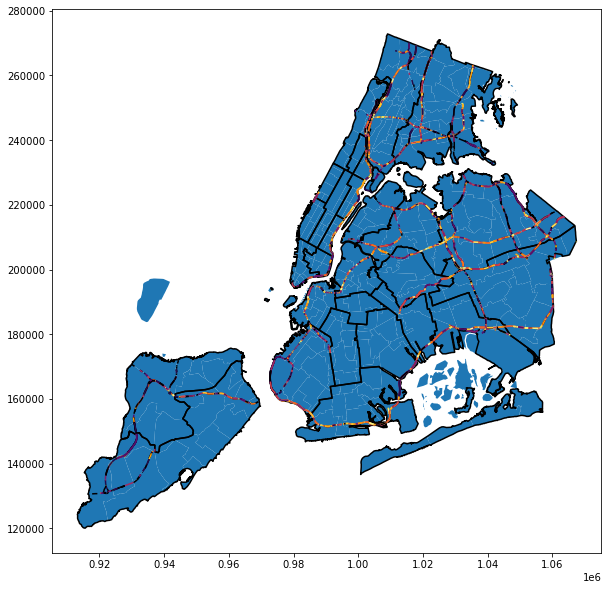

In [0]:
ax1 = municipalities_pd.to_crs(2263).boundary.plot(color='black')
ax2 = taxi_zone_pd.to_crs(2263).plot(ax=ax1)
ax3 = road_marker_accidents_pd.plot(ax=ax2, column='accident_percentile', cmap='inferno')
ax3.get_figure().set_size_inches(10, 10)

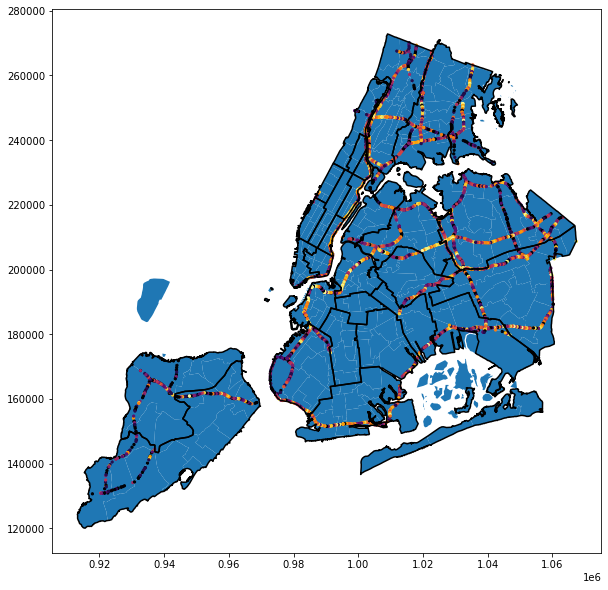

In [0]:
ax1 = municipalities_pd.to_crs(2263).boundary.plot(color='black')
ax2 = taxi_zone_pd.to_crs(2263).plot(ax=ax1)
ax3 = marker_road_accidents_pd.plot(ax=ax2, column='accident_percentile', cmap='inferno', markersize=5)
ax3.get_figure().set_size_inches(10, 10)

hotspots

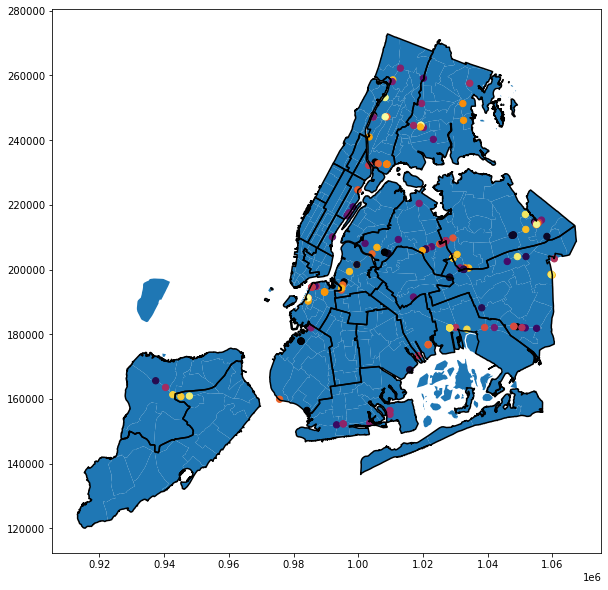

In [0]:
ax1 = municipalities_pd.to_crs(2263).boundary.plot(color='black')
ax2 = taxi_zone_pd.to_crs(2263).plot(ax=ax1)
ax3 = marker_road_accidents_pd[marker_road_accidents_pd.accident_percentile > 95].plot(ax=ax2, column='accident_percentile', cmap='inferno', markersize=40)
ax3.get_figure().set_size_inches(10, 10)